## MGMT 190: Data and Programming for Analytics
## Group 4: Anna Zhang, Ying Jin, Sang Do, Anuj Shah, Milisha Merchant, Egemen Can Gok

Dataset: http://jmcauley.ucsd.edu/data/amazon/links.html

Citation:


Image-based Recommendations on Styles and Substitutes
J. McAuley, C. Targett, J. Shi, A. van den Hengel
SIGIR, 2015

Inferring Networks of Substitutable and Complementary Products
J. McAuley, R. Pandey, J. Leskovec
Knowledge Discovery and Data Mining, 2015

In [1]:
# Import Statements

import json
import gzip # for opening .gz files

from IPython.display import HTML
from IPython.display import Image

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import urllib
import urllib2
import bs4 # Beautiful Soup

from pandas import Series
import pandas as pd
from pandas import DataFrame

import re
import random

import time
import datetime

In [2]:
def get_json(file_name):
    response = open(file_name + ".json", "r")
    result = []
    for json_line in response.readlines():
        json_text = json_line.decode(encoding = 'utf-8')
        result.append(json.loads(str(json_text)))
    return result

def sort_reviews_by_rating(file_name):
    return sorted(get_json(file_name), key = lambda x: x["overall"])

def review_stats(json_list):
    print "Number of Reviews: {}".format(len(json_list))
    print "Average Rating (of those who left a review): {}\n".format(np.mean(np.array([x["overall"] for x in json_list])).round(2)) 
    
def has_helpful(data):
    return data["helpful"][1] != 0

def helpfulness(data):
    return (float(data["helpful"][0])/float(data["helpful"][1]))

def helpfulness_and_rating(json_list):    
    helpful_data = []
    print "Helpfulness:"
    for i in range(1,5+1):
        helpful = [helpfulness(x) for x in json_list if has_helpful(x) and x["overall"] == i]
        helpful_data.append(np.mean(np.array(helpful))*100)
        print "Helpfulness of {}-Star Reviews: {}%".format(i, (helpful_data[i-1]).round(2))
    print ""
    plt.bar(range(1,6), helpful_data, color = 'g')
    plt.xlabel("Rating (out of 5)")
    plt.ylabel("Helpfulness %")
    plt.title("Helpfulness of Reviews (based on rating)")
    plt.show()
    
def count_words(data):
    return len(data['reviewText'].split())

def helpfulness_and_text(json_list):
    text_helpful = [count_words(x) for x in json_list if has_helpful(x) and count_words(x) >= 1000]
    h_over_1000 = [helpfulness(x)*100 for x in json_list if has_helpful(x) and count_words(x) >= 1000]
    plt.plot(text_helpful,h_over_1000,'r.')
    plt.xlabel("Number of Words")
    plt.ylabel("Helpfulness %")
    plt.title("Helpfulness of Reviews (based on number of words)")
    plt.show()
    
    char_helpful = [len(x['reviewText']) for x in json_list if has_helpful(x) and len(x['reviewText']) >= 5000]
    h_over_5000 = [helpfulness(x)*100 for x in json_list if has_helpful(x) and len(x['reviewText']) >= 5000]
    plt.plot(char_helpful,h_over_5000,'c.')
    plt.xlabel("Number of Characters")
    plt.ylabel("Helpfulness %")
    plt.title("Helpfulness of Reviews (based on character count)")
    plt.show()
    
    caps_helpful = []
    h_over_100 = []
    for x in json_list:
        if not has_helpful(x):
            continue
        count = 0
        words = x['reviewText'].split()
        for word in words:
            if word == word.upper():
                count += 1
        if count >= 100:
            caps_helpful.append(count)
            h_over_100.append(helpfulness(x)*100)
    plt.plot(caps_helpful,h_over_100,'m.')
    plt.xlabel("Number of Words in All Caps")
    plt.ylabel("Helpfulness %")
    plt.title("Helpfulness of Reviews (based on all caps)")
    plt.show()
    
    '''
    question_helpful = [x['reviewText'].count("?") for x in json_list if has_helpful(x)]
    plt.plot(question_helpful,h,'y.')
    plt.xlabel("Number of Question Marks")
    plt.ylabel("Helpfulness %")
    plt.title("Helpfulness % (based on number of questions)")
    plt.show()
    '''
    
    '''
    exclamation_helpful = [x['reviewText'].count("!") for x in json_list if has_helpful(x)]
    plt.plot(exclamation_helpful,h,'y.')
    plt.xlabel("Number of Exclamation Marks")
    plt.ylabel("Helpfulness %")
    plt.title("Helpfulness % (based on number of exclamations)")
    plt.show()
    '''
    
def ratings_over_time(json_list, time_period):
    rating_avg = []
    for year in time_period:
        review_times = [x["overall"] for x in json_list if int(x["reviewTime"].split()[2]) == year]
        rating_avg.append(np.mean(np.array(review_times)))
    plt.bar(time_period, rating_avg)
    plt.xlabel("Year")
    plt.ylabel("Average Rating")
    plt.title("Average Ratings Over Time")
    plt.show()
    
def lowest_reviews(json_list, n):
    print("Summaries of Lowest Reviews:") # n reviews with the lowest ratings
    i = 1
    for review_object in result[:n]:
        print(str(i) + ") " + review_object["summary"])
        i += 1
    print("\n")
    
def highest_reviews(json_list, n):
    print("Summaries of Highest Reviews:") # n reviews with the highest ratings
    i = 1
    for highest in result[-n:]:
        print(str(i) + ") " + highest["summary"])
        i += 1
    print("\n")

***Cell Phones and Accessories***

Number of Reviews: 194439
Average Rating (of those who left a review): 4.13

Helpfulness:
Helpfulness of 1-Star Reviews: 52.71%
Helpfulness of 2-Star Reviews: 53.94%
Helpfulness of 3-Star Reviews: 58.8%
Helpfulness of 4-Star Reviews: 73.2%
Helpfulness of 5-Star Reviews: 78.4%



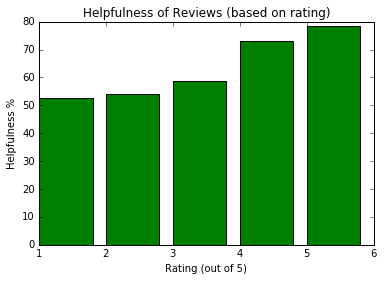

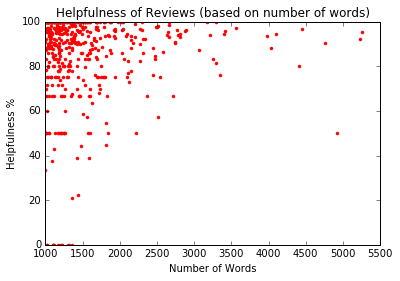

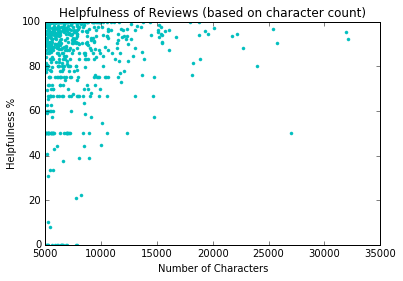

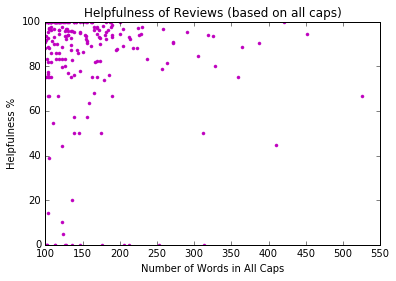

C:\Users\anujs_000\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
C:\Users\anujs_000\AppData\Local\Enthought\Canopy\User\lib\site-packages\numpy\core\_methods.py:70: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


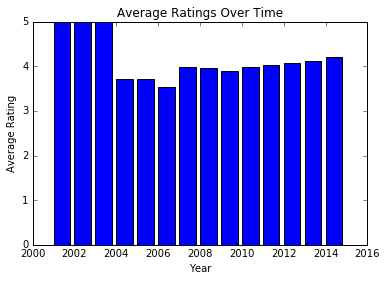

Summaries of Lowest Reviews:
1) not a good Idea
2) Horrible
3) don't waste your money, pay more and buy one at Walgreen s.
4) Be careful
5) bad experience


Summaries of Highest Reviews:
1) This works just perfect!
2) Great replacement cable. Apple certified
3) Real quality
4) I really like it becasue it works well with my Life Proof ...
5) I have wasted a lot of money on cords




In [3]:
print "***Cell Phones and Accessories***\n"
result = sort_reviews_by_rating("Cell_Phones_and_Accessories")
review_stats(result)
helpfulness_and_rating(result)
helpfulness_and_text(result)
ratings_over_time(result, range(1999,2014+1))
lowest_reviews(result, 5)
highest_reviews(result, 5)

In [4]:
def read_csv_file(file_name):
    return pd.read_csv(file_name + '.csv')

def convert_timestamp(tstamp):
    return datetime.datetime.fromtimestamp(int(tstamp)).strftime('%m/%d/%Y - %H:%M:%S')

In [5]:
phone_ratings = read_csv_file('Cell_Phones_and_Accessories')

# change all timestamps to proper date format
# phone_ratings.loc[:, 'Timestamp '] = phone_ratings['Timestamp '].map(lambda t: convert_timestamp(t))
# phone_ratings.head()

In [6]:
def rating_stats(table):
    print "Number of Ratings: {}".format(table["Rating"].count())
    print "Average Rating: {}".format(table["Rating"].mean().round(2))
    print "Date of First Rating: {}".format(convert_timestamp(table["Timestamp"].min()).split()[0])
    print "Date of Latest Rating: {}".format(convert_timestamp(table["Timestamp"].max()).split()[0])

rating_stats(phone_ratings)
print "Number of Users (who only rated the products): {}".format(phone_ratings["Rating"].count()-len(result))
phone_ratings.head()

Number of Ratings: 3447249
Average Rating: 3.81
Date of First Rating: 11/16/1999
Date of Latest Rating: 07/22/2014
Number of Users (who only rated the products): 3252810


,User,Item,Rating,Timestamp
0,A1EWN6KZ4HMLT7,011040047X,1.0,1344902400
1,A1YX2RBMS1L9L,0110400550,5.0,1353542400
2,A180NNPPKWCCU0,0110400550,5.0,1374105600
3,A3HVRXV0LVJN7,0110400550,5.0,1358035200
4,A292527VPX98P8,0110400550,1.0,1353888000


In [7]:
def get_all_product_reviews(table, item_id):
    return table[table.Item == str(item_id)]

reviews_0110400550 = get_all_product_reviews(phone_ratings, '0110400550')
reviews_0110400550.head()

,User,Item,Rating,Timestamp
1,A1YX2RBMS1L9L,0110400550,5.0,1353542400
2,A180NNPPKWCCU0,0110400550,5.0,1374105600
3,A3HVRXV0LVJN7,0110400550,5.0,1358035200
4,A292527VPX98P8,0110400550,1.0,1353888000
5,A1BJGDS0L1IO6I,0110400550,1.0,1359504000


In [8]:
def get_product_links(table):
    links = []
    count = 0
    base_url = "https://www.amazon.com/dp/"
    for i in table["Item"]:
        i = ("0"*(10-len(i)) + i)
        if (base_url + i) not in links:
            links.append(base_url + i)
            count += 1
            if count == 1000:
                break
    return links

phone_links = get_product_links(phone_ratings)
print phone_links

['https://www.amazon.com/dp/011040047X', 'https://www.amazon.com/dp/0110400550', 'https://www.amazon.com/dp/0195866479', 'https://www.amazon.com/dp/0214514706', 'https://www.amazon.com/dp/0214614700', 'https://www.amazon.com/dp/0214714705', 'https://www.amazon.com/dp/0594033918', 'https://www.amazon.com/dp/0641554214', 'https://www.amazon.com/dp/0989890945', 'https://www.amazon.com/dp/103824174X', 'https://www.amazon.com/dp/103984068X', 'https://www.amazon.com/dp/1049830512', 'https://www.amazon.com/dp/1059130386', 'https://www.amazon.com/dp/1059236222', 'https://www.amazon.com/dp/1059274930', 'https://www.amazon.com/dp/1059359189', 'https://www.amazon.com/dp/1059370514', 'https://www.amazon.com/dp/1059375362', 'https://www.amazon.com/dp/1059556936', 'https://www.amazon.com/dp/1059598515', 'https://www.amazon.com/dp/1059641577', 'https://www.amazon.com/dp/1059661160', 'https://www.amazon.com/dp/1059766019', 'https://www.amazon.com/dp/1059777851', 'https://www.amazon.com/dp/1059824477',

In [9]:
def product_titles(links):
    result = []
    num = 0
    for link in links:
        try:
            time.sleep(random.randrange(5,10))
            req = urllib2.Request(link, headers = {'User-Agent': 'Mozilla/5.0'})
            content = urllib2.urlopen(req).read()
            bs = bs4.BeautifulSoup(content, "lxml")
            result.append(" ".join(str(bs.find(id = "productTitle").string).split()))
            num += 1
            print "{} title(s) found!".format(num)
        except urllib2.HTTPError:
            print "HTTPError: Unable to connect to webpage."
            return result
        except AttributeError:
            print "AttributeError: Bot was detected.\n"
            return result
    return result

pt = product_titles(phone_links)
print pt

1 title(s) found!
2 title(s) found!
3 title(s) found!
4 title(s) found!
5 title(s) found!
6 title(s) found!
7 title(s) found!
8 title(s) found!
9 title(s) found!
10 title(s) found!
11 title(s) found!
12 title(s) found!
13 title(s) found!
14 title(s) found!
15 title(s) found!
16 title(s) found!
17 title(s) found!
18 title(s) found!
19 title(s) found!
20 title(s) found!
21 title(s) found!
22 title(s) found!
23 title(s) found!
24 title(s) found!
25 title(s) found!
26 title(s) found!
27 title(s) found!
28 title(s) found!
29 title(s) found!
30 title(s) found!
HTTPError: Unable to connect to webpage.
['Purple Hard Case Cover for Iphone 4 4s 4g with 3d Sculpture Design Blossom Rose Flower', 'Pink & White 3d Melt Ice-cream Skin Hard Case Cover for Apple Iphone 4 4s Protect Cell', 'Hello Kitty Light-weighted Chrome Case Black Color for iphone 4 4G (HOT ITEM)', 'Cool Summer Breeze in the Ocean Beach Collection: iPhone4/4s Case with Embossment- The Fish', 'Cool Summer Breeze in the Ocean Beach Co

In [10]:
def get_user_links(table):
    links = []
    count = 0
    base_url = "https://www.amazon.com/gp/profile/"
    for i in table["User"]:
        links.append(base_url + i)
        count += 1
        if count == 1000:
            break
    return links

user_links = get_user_links(phone_ratings)
print user_links

['https://www.amazon.com/gp/profile/A1EWN6KZ4HMLT7', 'https://www.amazon.com/gp/profile/A1YX2RBMS1L9L', 'https://www.amazon.com/gp/profile/A180NNPPKWCCU0', 'https://www.amazon.com/gp/profile/A3HVRXV0LVJN7', 'https://www.amazon.com/gp/profile/A292527VPX98P8', 'https://www.amazon.com/gp/profile/A1BJGDS0L1IO6I', 'https://www.amazon.com/gp/profile/ANG01NK4RXCI9', 'https://www.amazon.com/gp/profile/AL7D46UHDVZVC', 'https://www.amazon.com/gp/profile/A1KO9L34Z7548N', 'https://www.amazon.com/gp/profile/A30P2CYOUYAJM8', 'https://www.amazon.com/gp/profile/A3KN7WFLV7LKBM', 'https://www.amazon.com/gp/profile/A2EAQOC1HHPCFY', 'https://www.amazon.com/gp/profile/A2UCUB1VC1SDJK', 'https://www.amazon.com/gp/profile/A1LNL9KCAUBIT', 'https://www.amazon.com/gp/profile/A31IRT3Q3VZCBN', 'https://www.amazon.com/gp/profile/A2WDCRQNARX6MG', 'https://www.amazon.com/gp/profile/A2HL78OBL9UYRE', 'https://www.amazon.com/gp/profile/A14C9GGECI06HU', 'https://www.amazon.com/gp/profile/A1MGIQYOKFU7OF', 'https://www.ama

In [11]:
def user_locations(links):
    result = []
    num = 0
    for link in links:
        try:
            time.sleep(random.randrange(5,10))
            req = urllib2.Request(link, headers = {'User-Agent': 'Mozilla/5.0'})
            content = urllib2.urlopen(req).read()
            bs = bs4.BeautifulSoup(content, "lxml")
            if bs.find(class_ = "a-fixed-right-grid location-and-occupation-holder"):
                result.append(str(bs.find(class_ = "a-fixed-right-grid location-and-occupation-holder").span.string))
                num += 1
                print "{} location(s) found!".format(num)
        except urllib2.HTTPError:
            print "HTTPError: Unable to connect to webpage."
            return result
        except AttributeError:
            print "AttributeError: Bot was detected."
            return result
    return result
            
ul = user_locations(user_links)
print ul

1 location(s) found!
2 location(s) found!
HTTPError: Unable to connect to webpage.
['San Ramon, CA', 'California, USA']


In [12]:
from collections import defaultdict
counts = defaultdict(int)

abbr = {"AL":"Alabama","AK":"Alaska","AZ":"Arizona","AR":"Arkansas","CA":"California","CO":"Colorado","CT":"Connecticut",
        "DE":"Delaware","FL":"Florida","GA":"Georgia","HI":"Hawaii","ID":"Idaho","IL":"Illinois","IN":"Indiana","IA":"Iowa",
        "KS":"Kansas","KY":"Kentucky","LA":"Louisiana","ME":"Maine","MD":"Maryland","MA":"Massachusetts","MI":"Michigan",
        "MN":"Minnesota","MS":"Mississippi","MO":"Missouri","MT":"Montana","NE":"Nebraska","NV":"Nevada","NH":"New Hampshire",
        "NJ":"New Jersey","NM":"New Mexico","NY":"New York","NC":"North Carolina","ND":"Norta Dakota","OH":"Ohio",
        "OK":"Oklahoma","OR":"Oregon","PA":"Pennsylvania","RI":"Rhode Island","SC":"South Carolina","SD":"South Dakota",
        "TN":"Tennessee","TX":"Texas","UT":"Utah","VT":"Vermont","VA":"Virginia","WA":"Washington","WV":"West Virginia",
        "WI":"Wisconsin","WY":"Wyoming"}
cities = {"Chicago":"Illinois","San Ramon":"California","Murfreesboro":"Tennessee","Doral":"Florida","Vicksburg":"Mississippi",
          "Barstow":"California","Shell Knob":"Missouri","Portland":"Oregon","Kettering":"Ohio","Santa Clarita":"California",
          "Sacramento":"California","New York":"New York","Providence":"Rhode Island","Santa Ana":"California",
          "Anaheim":"California","Philadelphia":"Pennsylvania","Franklin":"Pennsylvania","Brunswick":"Ohio","Phoenix":"Arizona",
          "Downey":"California","Louisville":"Kentucky","Houston":"Texas","Brooklyn":"New York","Fairfield":"California",
          "Inland Empire":"California","Lakewood":"California","Saint Paul":"Minnesota"}
usa_variations = ["us","usa","united states"]

for loc in ul:
    
    in_us = False
    
    if loc.capitalize() in cities.keys():
        loc = loc.capitalize() + ", " + cities[loc.capitalize()]
        
    l = "".join(re.split(r'[\.]', " ".join(re.split(r'[;|,]', loc))))
    splitted = l.split()
    l = " ".join(splitted)
    # print l
    
    if l in abbr.values():
        in_us = True
        counts[l] += 1
    else:
        for word in splitted:
            if word in abbr.keys():
                in_us = True
                counts[abbr[word]] += 1
                break
            elif word.capitalize() in abbr.values():
                in_us = True
                counts[word.capitalize()] += 1
                break
            elif word.upper() in abbr.keys() and any([x.upper() in splitted for x in usa_variations]):
                in_us = True
                counts[abbr[word.upper()]] += 1
                break
            elif word in cities:
                in_us = True
                counts[cities[word]] += 1
                break
                
    if any([x in l.lower() for x in usa_variations]) or in_us:
        counts["USA"] += 1
    else:
        counts["Other"] += 1
    counts["Total"] += 1
    
print dict(counts)
# print
# for x in ul:
    # print x

{'Total': 2, 'California': 2, 'USA': 2}


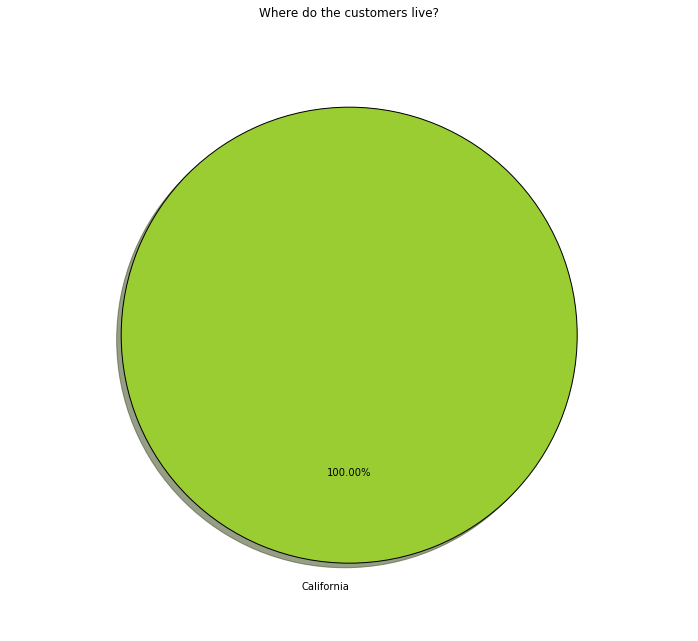

In [13]:
# http://matplotlib.org/examples/color/named_colors.html
state_labels = sorted({x for x in counts.keys() if x not in ['USA','Other','Total']})
percentages = [(float(counts[label])/counts['USA'])*100 for label in state_labels]
max_percentage = max(percentages)
pop_out = tuple((0.1 if s == max_percentage else 0.0) for s in percentages)
custom_colors = ['yellowgreen','gold','lightskyblue','blue','red','green','purple','orange','cyan','magenta','yellow',
                 'silver','darkgreen','hotpink','lightcoral','chocolate','midnightblue','indigo']
figure, ax = plt.subplots()
ax.pie(percentages, explode=pop_out, labels=state_labels, autopct='%2.2f%%', shadow=True, startangle=90, colors = custom_colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.rcParams['font.size'] = 10.0
# ax.legend(state_labels, loc='best')
ax.set_title("Where do the customers live?\n")
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [14]:
def parse_json(file_path):
    gz = gzip.open(file_path, 'r')
    for data in gz:
        yield eval(data)
        
metadata = parse_json("metadata.json.gz")

In [15]:
def get_data_frame(file_path):
    index = 0
    data_frame = {}
    for product in parse_json(file_path):
        data_frame[index] = product
        index += 1
    return pd.DataFrame.from_dict(data_frame, orient='index')

# md_df = get_data_frame("metadata.json.gz")

In [16]:
collection = []
i = 0
current = metadata.next()
while (current != None):
    if 'categories' in current and 'price' in current:
        d = {}
        d['title'] = current['title']
        d['price'] = "$" + str(current['price'])
        collection.append(d)
        i += 1
        if i == 1000:
            break
    current = metadata.next()
print collection

[{'price': '$12.99', 'title': 'Everyday Italian (with Giada de Laurentiis), Volume 1 (3 Pack): Italian Classics, Parties, Holidays'}, {'price': '$6.99', 'title': 'Purple Sequin Tiny Dancer Tutu Ballet Dance Fairy Princess Costume Accessory'}, {'price': '$7.89', 'title': 'Adult Ballet Tutu Cheetah Pink'}, {'price': '$7.0', 'title': 'Girls Ballet Tutu Neon Pink'}, {'price': '$7.87', 'title': 'Adult Ballet Tutu Yellow'}, {'price': '$15.95', 'title': "Why Don't They Just Quit? DVD Roundtable Discussion: What Families and Friends need to Know About Addiction and Recovery"}, {'price': '$3.17', 'title': 'Girls Ballet Tutu Zebra Hot Pink'}, {'price': '$9.26', 'title': 'The Sherlock Holmes Audio Collection'}, {'price': '$5.39', 'title': "Classic Soul Winner's New Testament Bible"}, {'price': '$17.99', 'title': 'War Poems: An Anthology of Poetry from the 18th Cantury to the Present Day'}, {'price': '$23.26', 'title': 'The Way Things Work: An Illustrated Encyclopedia of Technology'}, {'price': '$